In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string
import numpy as np

In [3]:
master1 = pd.read_csv('master_lyrics_data.csv')
master2 = pd.read_csv('master_lyrics_data2.csv')
master = pd.concat((master1, master2), axis=0).dropna(axis=0, how='any').reset_index(drop=True)

master.head()

,lyrics,song,album,artist,genre
0,"Say your prayers, little one Don't forget, my ...",enter sandman,metallica,metallica,heavy metal
1,Hey (hey) I'm your life I'm the one who takes ...,sad but true,metallica,metallica,heavy metal
2,No more! The crap rolls out your mouth again H...,holier than thou,metallica,metallica,heavy metal
3,New blood joins this earth And quickly he's su...,the unforgiven,metallica,metallica,heavy metal
4,(And the road becomes my bride) And the road b...,wherever i may roam,metallica,metallica,heavy metal


In [4]:
master.genre.value_counts()

country        857
heavy metal    617
rap            568
rock           490
pop            449
Name: genre, dtype: int64

In [5]:
tknzr = nltk.TweetTokenizer()
token_count = []

for lyric in master.lyrics:
    tokens = tknzr.tokenize(lyric)
    list_ = [token for token in tokens if token not in string.punctuation]
    token_count.append(len(list_))
    
master['total_token_count'] = token_count

master.head()

,lyrics,song,album,artist,genre,total_token_count
0,"Say your prayers, little one Don't forget, my ...",enter sandman,metallica,metallica,heavy metal,245
1,Hey (hey) I'm your life I'm the one who takes ...,sad but true,metallica,metallica,heavy metal,287
2,No more! The crap rolls out your mouth again H...,holier than thou,metallica,metallica,heavy metal,169
3,New blood joins this earth And quickly he's su...,the unforgiven,metallica,metallica,heavy metal,298
4,(And the road becomes my bride) And the road b...,wherever i may roam,metallica,metallica,heavy metal,309


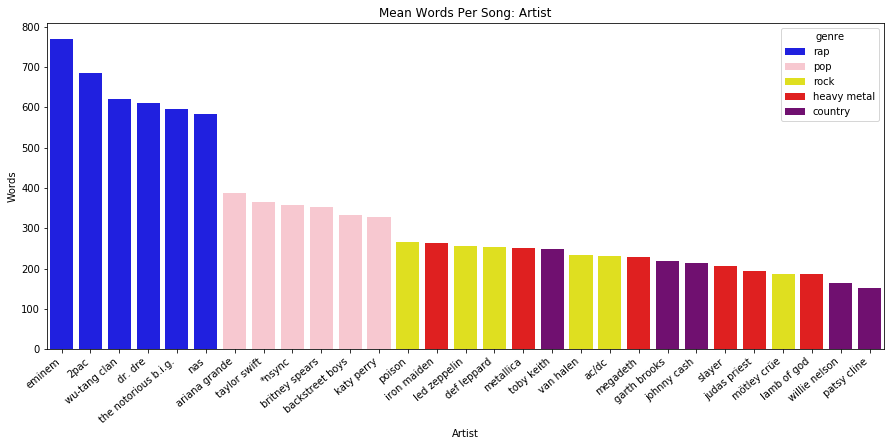

In [6]:
genres = master[['artist', 'genre']].drop_duplicates('artist').sort_values('artist').set_index('artist').genre

artist_mean_tokens = pd.concat((master.artist, master.total_token_count), axis=1).groupby('artist').mean()
artist_mean_tokens = pd.concat((artist_mean_tokens, genres), axis=1, ignore_index=True)
artist_mean_tokens.columns = ['word_count', 'genre']
artist_mean_tokens = artist_mean_tokens.sort_values('word_count', ascending=False)

colormap = {'heavy metal': 'red', 
            'rap': 'blue', 
            'pop': 'pink', 
            'country': 'purple', 
            'rock': 'yellow'}

plt.figure(figsize=(15,6))
sns.barplot(x=artist_mean_tokens.index, 
            y=artist_mean_tokens.word_count, 
            data=artist_mean_tokens, 
            hue='genre', 
            dodge=False, 
            palette=colormap)
plt.xticks(rotation=40, ha='right')
plt.xlabel('Artist')
plt.ylabel('Words')
plt.title('Mean Words Per Song: Artist')
plt.show()

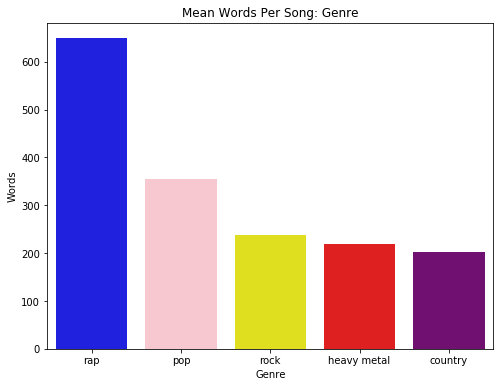

In [7]:
genre_mean_tokens = pd.concat((master.genre, master.total_token_count), axis=1).groupby('genre').mean()
genre_mean_tokens.columns = ['word_count']
genre_mean_tokens = genre_mean_tokens.sort_values('word_count', ascending=False)

colormap = {'heavy metal': 'red', 
            'rap': 'blue', 
            'pop': 'pink', 
            'country': 'purple', 
            'rock': 'yellow'}

plt.figure(figsize=(8,6))
sns.barplot(x=genre_mean_tokens.index, 
            y=genre_mean_tokens.word_count, 
            data=genre_mean_tokens, 
            hue=genre_mean_tokens.index, 
            dodge=False, 
            palette=colormap).legend_.remove()
plt.xlabel('Genre')
plt.ylabel('Words')
plt.title('Mean Words Per Song: Genre')
plt.show()

In [8]:
more_words=['yo','oh','yeah','ooh','ow','cha','rahh','ah','ya','yuh','hey','boooooo','na','le','la',
            'aha', 'ahah', 'ahaha', 'ahahaha', 'ahahahaha', 'ahe','ahh', 'ahhah', 'ahhh', 'ahhhah', 'ahhhh', 'ahhhhh',
            'aoowww','amin','assin','ckin']

word_conversion = {'till': 'until', 'motherfuckin': 'motherfucking', 'aight': 'alright', "ol'": 'old', 'ol': 'old',
                   'playiyay': 'play', 'yah': 'you', 'gonna': 'going to', 'wanna': 'want to', 'kinda': 'kind of', 
                   'gotcha': 'got you', 'atcha': 'at you', 'wrecka': 'wrecker', 'em': 'them', 'masta': 'master', 
                   'wit': 'with', 'fuckin': 'fucking', 'imma': 'i am going to', 'illa': 'iller', 'wuz': 'was', 
                   'nuff': 'enough', 'getcha': 'get you', 'gatcha': 'gat you', 'whadeva': 'whatever', 'outta': 'out of', 
                   'absorbin': 'absorbing', 'abusin': 'abusing', 'acceptin': 'accepting', 'achin': 'aching', 
                   'acvtivatin': 'acvtivating', 'adaptin': 'adapting', 'addin': 'adding', 'addressin': 'addressing', 
                   'admirin': 'admiring', 'adoptin': 'adopting', 'affectin': 'affecting', 'aggravatin': 'aggravating', 
                   'agreein': 'agreeing', 'aimin': 'aiming', 'amazin': 'amazing', 'analyzin': 'analyzing', 
                   'annoyin': 'annoying', 'anticipatin': 'anticipating', 'apoligizin': 'apoligizing', 
                   'appallin': 'appalling', 'appearin': 'appearing', 'applyin': 'applying', 'approachin': 'approaching', 
                   'arguin': 'arguing', 'askin': 'asking', 'asphyxiatin': 'asphyxiating', 'assemblin': 'assembling', 
                   'assumin': 'assuming', 'attractin': 'attracting', 'avoidin': 'avoiding', 'babblin': 'babbling', 
                   'backdoorslammin': 'backdoorslamming', 'backin': 'backing', 'backstabbin': 'backstabbing', 
                   'baggin': 'bagging', 'bailin': 'bailing', 'bakin': 'baking', 'ballin': 'balling', 
                   'balllin': 'balling', 'bangin': 'banging', 'bankin': 'banking', 'bargainin': 'bargaining', 
                   'barkin': 'barking', 'bathin': 'bathing', 'battin': 'batting', 'battlin': 'battling', 
                   'bawlin': 'bawling', 'bblastin': 'blasting', 'beamin': 'beaming', 'beatin': 'beating', 
                   'becomin': 'becoming', 'beggin': 'begging', 'beginnin': 'beginning', 'bein': 'being', 
                   'believin': 'believing', 'bendin': 'bending', 'bettin': 'betting', 'biddin': 'bidding', 
                   'billin': 'billing', 'bitchin': 'bitching', 'bitin': 'biting', 'blackin': 'blacking', 
                   'blamin': 'blaming', 'blastin': 'blasting', 'blazin': 'blazing', 'bleachin': 'bleaching', 
                   'bleedin': 'bleeding', 'blessin': 'blessing', 'blindin': 'blinding', 'blinkin': 'blinking', 
                   'blisterin': 'blistering', 'blockin': 'blocking', 'bloggin': 'blogging', 'bloodin': 'blooding', 
                   'blowin': 'blowing', 'bluffin': 'bluffing', 'blushin': 'blushing', 'bodyin': 'bodying', 
                   'bogglin': 'boggling', 'boilin': 'boiling', 'bokin': 'boking', 'bombin': 'bombing', 'bonin': 
                   'boning', 'bookin': 'booking', 'boostin': 'boosting', 'boozin': 'boozing', 'boppin': 'bopping', 
                   'borin': 'boring', 'bossin': 'bossing', 'botherin': 'bothering', 'bouncin': 'bouncing', 'boxin': 
                   'boxing', 'braggin': 'bragging', 'brawlin': 'brawling', 'brayin': 'braying', 'breakin': 'breaking', 
                   'breathin': 'breathing', 'bringin': 'bringing', 'brokin': 'broking', 'bruisin': 'bruising', 
                   'brushin': 'brushing', 'bubblin': 'bubbling', 'buckin': 'bucking', 'buggin': 'bugging', 
                   'buildin': 'building', 'buillshittin': 'bullshitting', 'bulgin': 'bulging', 
                   'bullshitin': 'bullshitting', 'bullshittin': 'bullshitting', 'bumblin': 'bumbling', 'bumpin': 'bumping', 
                   'burnin': 'burning', 'burryin': 'burying', 'buryin': 'burying', 'bustin': 'busting', 'buyin': 'buying', 
                   'buzzin': 'buzzing', 'cakin': 'caking', 'callin': 'calling', 'carin': 'caring', 
                   'carressin': 'carressing', 'carryin': 'carrying', 'cashin': 'cashing', 'castin': 'casting', 
                   'catchin': 'catching', 'causin': 'causing', 'cavortin': 'cavorting', 'ceilin': 'ceiling', 
                   'celebratin': 'celebrating', 'chainin': 'chaining', 'changin': 'changing', 'channelin': 'channeling', 
                   'chantin': 'chanting', 'chargin': 'charging', 'chasin': 'chasing', 'chatterin': 'chattering', 
                   'chattin': 'chatting', 'cheatin': 'cheating', 'checkin': 'checking', 'chewin': 'chewing', 
                   'chillin': 'chilling', 'chokin': 'choking', 'choosin': 'choosing', 'choppin': 'chopping', 
                   'churnin': 'churning', 'circlin': 'circling', 'claimin': 'claiming', 'clappin': 'clapping', 
                   'clashin': 'clashing', 'cleanin': 'cleaning', 'clearin': 'clearing', 'clickin': 'clicking', 
                   'climaxin': 'climaxing', 'climbin': 'climbing', 'clingin': 'clinging', 'clockin': 'clocking', 
                   'closin': 'closing', 'clothin': 'clothing', 'clownin': 'clowning', 'clubbin': 'clubbing', 
                   'clutchin': 'clutching', 'coachin': 'coaching', 'coastin': 'coasting', 'cockin': 'cocking', 
                   'codesignin': 'code signing', 'cokein': 'cokeing', 'collapsin': 'collapsing', 'collectin': 
                   'collecting', 'collidin': 'colliding', 'combinin': 'combining', 'comin': 'coming', 
                   'commin': 'coming', 'committin': 'committing', 'communicatin': 'communicating', 
                   'competin': 'competing', 'complainin': 'complaining', 'complicatin': 'complicating', 
                   'concealin': 'concealing', 'confusin': 'confusing', 'connivin': 'conniving', 'consolin': 'consoling', 
                   'contemplatin': 'contemplating', 'contractin': 'contracting', 'controllin': 'controlling', 
                   'conversatin': 'conversating', 'convincin': 'convincing', 'cooin': 'cooing', 'cookin': 'cooking', 
                   'coolin': 'cooling', 'counselin': 'counseling', 'countin': 'counting', 'coverin': 'covering', 
                   'crackin': 'cracking', 'cracklin': 'crackling', 'crashin': 'crashing', 'cravin': 'craving', 
                   'crawlin': 'crawling', 'creatin': 'creating', 'creepin': 'creeping', 'critiquin': 'critiquing', 
                   'croakin': 'croaking', 'crossin': 'crossing', 'cruisin': 'cruising', 'crushin': 'crushing', 
                   'cryin': 'crying', 'crypin': 'cryping', 'cuddlin': 'cuddling', 'cuppin': 'cupping', 
                   'cursin': 'cursing', 'cushin': 'cushing', 'cussin': 'cussing', 'cuttin': 'cutting', 
                   'dallyin': 'dallying', 'dancin': 'dancing', 'darlin': 'darling', 'dartin': 'darting', 
                   'datin': 'dating', 'daydreamin': 'daydreaming', 'dealin': 'dealing', 'debatin': 'debating', 
                   'decapitatin': 'decapitating', 'deceivin': 'deceiving', 'decidin': 'deciding', 
                   'dedicatin': 'dedicating', 'defendin': 'defending', 'deficatin': 'deficating', 
                   'deliverin': 'delivering', 'demandin': 'demanding', 'demonstratin': 'demonstrating', 
                   'denyin': 'denying', 'dependin': 'depending', 'depositin': 'depositing', 'depressin': 'depressing', 
                   'deservin': 'deserving', 'despisin': 'despising', 'destroyin': 'destroying', 
                   'devastatin': 'devastating', 'devin': 'deving', 'devisin': 'devising', 'devourin': 'devouring', 
                   'dickin': 'dicking', 'diggin': 'digging', 'dimin': 'dimming', 'dimmin': 'dimming', 'dinin': 'dining', 
                   'dippin': 'dipping', 'disappearin': 'disappearing', 'discriminatin': 'discriminating', 
                   'discussin': 'discussing', 'disgustin': 'disgusting', 'dishin': 'dishing', 
                   'disintegratin': 'disintegrating', 'dispensin': 'dispensing', 'displayin': 'displaying', 
                   'dissapearin': 'dissapearing', 'dissin': 'dissing', 'dividin': 'dividing', 'dodgin': 'dodging', 
                   'doggin': 'dogging', 'doin': 'doing', 'doublin': 'doubling', 'doubtin': 'doubting', 
                   'draggin': 'dragging', 'dragin': 'dragging', 'drainin': 'draining', 'drawin': 'drawing', 
                   'dreadin': 'dreading', 'dreamin': 'dreaming', 'drenchin': 'drenching', 'dressin': 'dressing', 
                   'driftin': 'drifting', 'drillin': 'drilling', 'drinkin': 'drinking', 'drippin': 'dripping', 
                   'drivin': 'driving', 'droolin': 'drooling', 'dropin': 'dropping', 'droppin': 'dropping', 
                   'drownin': 'drowning', 'drummin': 'drumming', 'drunkin': 'drunken', 'dubbin': 'dubbing', 
                   'duckin': 'ducking', 'dumbin': 'dumbing', 'dumpin': 'dumping', 'dunkin': 'dunking', 
                   'durin': 'during', 'dustin': 'dusting', 'dutchin': 'dutching', 'dwarfin': 'dwarfing', 
                   'dwellin': 'dwelling', 'dyin': 'dying', 'eatin': 'eating', 'effin': 'effing', 'eggin': 'egging', 
                   'ejectin': 'ejecting', 'eliminatin': 'eliminating', 'embarrassin': 'embarrassing', 
                   'embracin': 'embracing', 'emergin': 'emerging', 'endin': 'ending', 'enjoyin': 'enjoying', 
                   'enterin': 'entering', 'enterprisin': 'enterprising', 'entertainin': 'entertaining', 
                   'envisionin': 'envisioning', 'erasin': 'erasing', 'evadin': 'evading', 'evenin': 'evening', 
                   'everlastin': 'everlasting', 'everythin': 'everything', 'excitin': 'exciting', 
                   'executin': 'executing', 'exisitin': 'exisiting', 'expandin': 'expanding', 'expectin': 'expecting', 
                   'expellin': 'expelling', 'experiencin': 'experiencing', 'explodin': 'exploding', 
                   'eyeballin': 'eyeballing', 'eyein': 'eyeing', 'facin': 'facing', 'fackin': 'facking', 
                   'fadin': 'fading', 'faintin': 'fainting', 'fakin': 'faking', 'fallin': 'falling', 
                   'fantasizin': 'fantasizing', 'farmin': 'farming', 'fazin': 'fazing', 'fearin': 'fearing', 
                   'feedin': 'feeding', 'feelin': 'feeling', 'feenin': 'fiending', 'fellin': 'felling', 
                   'fiendin': 'fiending', 'fightin': 'fighting', 'figurin': 'figuring', 'fillin': 'filling', 
                   'filmin': 'filming', 'findin': 'finding', 'finishin': 'finishing', 'finnickin': 'finnicking', 
                   'firin': 'firing', 'fishin': 'fishing', 'fistboxin': 'fistboxing', 'fistin': 'fisting', 
                   'fittin': 'fitting', 'fixin': 'fixing', 'flaggin': 'flagging', 'flamin': 'flaming', 
                   'flappin': 'flapping', 'flarin': 'flaring', 'flashin': 'flashing', 'flexin': 'flexing', 
                   'flippin': 'flipping', 'floatin': 'floating', 'flossin': 'flossing', 'flowin': 'flowing', 
                   'flushin': 'flushing', 'flyin': 'flying', 'focusin': 'focusing', 'foldin': 'folding', 
                   'followin': 'following', 'foolin': 'fooling', 'forcin': 'forcing', 'forgettin': 'forgetting', 
                   'forgivin': 'forgiving', 'formulatin': 'formulating', 'forthcomin': 'forthcoming', 
                   'foulin': 'fouling', 'freakin': 'freaking', 'freestylin': 'freestyling', 'freezin': 'freezing', 
                   'frightenin': 'frightening', 'frightnin': 'frightening', 'frontin': 'fronting', 
                   'frownin': 'frowning', 'fryin': 'frying', 'fufillin': 'fulfilling', 'fulfillin': 'fulfilling', 
                   'fumin': 'fuming', 'fussin': 'fussing', 'gainin': 'gaining', 'gamblin': 'gambling', 
                   'gangbangin': 'gangbanging', 'gangbanin': 'gangbanging', 'gasolinin': 'gasoline', 
                   'gaspin': 'gasping', 'gassin': 'gassing', 'gatherin': 'gathering', 'gawkin': 'gawking', 
                   'gazin': 'gazing', 'gettin': 'getting', 'ghostin': 'ghosting', 'givin': 'giving', 
                   'gleamin': 'gleaming', 'glidin': 'gliding', 'glistenin': 'glistening', 'glockin': 'glocking', 
                   'glorifyin': 'glorifying', 'glowin': 'glowing', 'gluin': 'gluing', 'goin': 'going', 
                   'golddiggin': 'golddigging', 'golfin': 'golfing', 'gougin': 'gouging', 'governin': 'governing', 
                   'grabbin': 'grabbing', 'grievin': 'grieving', 'grillin': 'grilling', 'grindin': 'grinding', 
                   'grinin': 'grinning', 'grinnin': 'grinning', 'grippin': 'gripping', 'groanin': 'groaning', 
                   'groovin': 'grooving', 'growin': 'growing', 'guaranteein': 'guaranteeing', 'guessin': 'guessing', 
                   'gunnin': 'gunning', 'guzzlin': 'guzzling', 'hailin': 'hailing', 'hallicinatin': 'hallucinating', 
                   'hallucinatin': 'hallucinating', 'handin': 'handing', 'handlin': 'handling', 'hangin': 'hanging', 
                   'happenin': 'happening', 'happennin': 'happening', 'harassin': 'harassing', 
                   'harmonizin': 'harmonizing', 'hasslin': 'hassling', 'hastin': 'hasting', 'hatin': 'hating', 
                   'haulin': 'hauling', 'hauntin': 'haunting', 'havin': 'having', 'hawkin': 'hawking', 
                   'hazin': 'hazing', 'headin': 'heading', 'healin': 'healing', 'hearin': 'hearing', 
                   'heatin': 'heating', 'helpin': 'helping', 'hesitatin': 'hesitating', 'hidin': 'hiding', 
                   'hijackin': 'hijacking', 'hitin': 'hitting', 'hittin': 'hitting', 'hoein': 'hoeing', 
                   'holdin': 'holding', 'hollerin': 'hollering', 'homecomin': 'homecoming', 'honkin': 'honking', 
                   'hookin': 'hooking', 'hootin': 'hooting', 'hopin': 'hoping', 'hoppin': 'hopping', 
                   'housin': 'housing', 'howlin': 'howling', 'huffin': 'huffing', 'huggin': 'hugging', 
                   'hummin': 'humming', 'humpin': 'humping', 'huntin': 'hunting', 'hurtin': 'hurting', 
                   'hustlin': 'hustling', 'icin': 'icing', 'illin': 'illing', 'imagin': 'imaging', 
                   'imaginin': 'imagining', 'impressin': 'impressing', 'inflictin': 'inflicting', 'innin': 'inning', 
                   'interestin': 'interesting', 'intergratin': 'intergrating', 'interrogatin': 'interrogating', 
                   'intertwinin': 'intertwining', 'introducin': 'introducing', 'investin': 'investing', 
                   'invitin': 'inviting', 'ironin': 'ironing', 'irritatin': 'irritating', 'itchin': 'itching', 
                   'jackin': 'jacking', 'jammin': 'jamming', 'jeapordizin': 'jeapordizing', 'jettin': 'jetting', 
                   'jockin': 'jocking', 'jokin': 'joking', 'jottin': 'jotting', 'judgin': 'judging', 
                   'jugglin': 'juggling', 'juicin': 'juicing', 'jumpin': 'jumping', 'justin': 'justing', 
                   'keepin': 'keeping', 'kickin': 'kicking', 'kiddin': 'kidding', 'kidnappin': 'kidnapping', 
                   'killin': 'killing', 'kingin': 'kinging', 'kissin': 'kissing', 'knahmsayin': 'know what i am saying', 
                   'knifin': 'knifing', 'knockin': 'knocking', 'knowhatimsayin': 'know what i am saying', 
                   'knowin': 'knowing', 'lampin': 'lamping', 'landin': 'landing', 'lastin': 'lasting', 
                   'laughin': 'laughing', 'launchin': 'launching', 'layin': 'laying', 'leakin': 'leaking', 
                   'leanin': 'leaning', 'leapin': 'leaping', 'learnin': 'learning', 'leavin': 'leaving', 
                   'lettin': 'letting', 'levatatin': 'levatating', 'lickin': 'licking', 
                   'lifemotherfuckin': 'life motherfucking', 'lifin': 'lifing', 'liftin': 'lifting', 
                   'lightin': 'lighting', 'lightnin': 'lightning', 'linkin': 'linking', 'listenin': 'listening', 
                   'listin': 'listing', 'livin': 'living', 'loadin': 'loading', 'loafin': 'loafing', 
                   'loathin': 'loathing', 'lockin': 'locking', 'lokin': 'locking', 'lookin': 'looking', 
                   'loopin': 'looping', 'loosin': 'losing', 'losin': 'losing', 'loungin': 'lounging', 'lovin': 'loving', 
                   'lurkin': 'lurking', 'lustin': 'lusting', 'lyin': 'lying', 'lynchin': 'lynching', 'mackin': 'macking',
                   'makin': 'making', 'manifestin': 'manifesting', 'marchin': 'marching', 'marryin': 'marrying',
                   'mashin': 'mashing', 'masturbatin': 'masturbating', 'matchin': 'matching', 'maxin': 'maxing', 
                   'mcin': 'mcing', 'mdoin': 'mdoing', 'meanin': 'meaning', 'measurin': 'measuring', 
                   'meditatin': 'meditating', 'meltin': 'melting', 'mendin': 'mending', 'mentionin': 'mentioning',
                   'mindin': 'minding', 'mindscapin': 'mindscaping', 'miragin': 'miraging', 'missin': 'missing', 
                   'mistakin': 'mistaking', 'mistin': 'misting', 'misusin': 'misusing', 'mixin': 'mixing', 
                   'moanin': 'moaning', 'mobbin': 'mobbing', 'modelin': 'modeling', 'moldin': 'molding', 
                   'molestin': 'molesting', 'moppin': 'mopping', 'mornin': 'morning', 'morphin': 'morphing', 
                   'mothafuckin': 'motherfucking', 'mothefuckin': 'motherfucking', 'mournin': 'mourning', 
                   'mouthin': 'mouthing', 'movin': 'moving', 'mowin': 'mowing', 'muggin': 'mugging', 
                   'muhfuckin': 'motherfucking', 'murderin': 'murdering', 'muthafuckin': 'motherfucking', 
                   'mutherfuckin': 'motherfucking', 'mystifyin': 'mystifying', 'nappin': 'napping', 
                   'needin': 'needing', 'noddin': 'nodding', 'nothin': 'nothing', 'nursin': 'nursing', 
                   'nuttin': 'nutting', 'obeyin': 'obeying', 'obscurin': 'obscuring', 'observin': 'observing', 
                   'offendin': 'offending', 'oilin': 'oiling', 'openin': 'opening', 'outlastin': 'outlasting', 
                   'outweighin': 'outweighing', 'overdosin': 'overdosing', 'overtakin': 'overtaking', 
                   'overthuggin': 'overthugging', 'overwhelmin': 'overwhelming', 'ownin': 'owning', 
                   'pacin': 'pacing', 'packin': 'packing', 'pagin': 'paging', 'paintin': 'painting', 
                   'palmin': 'palming', 'pamprin': 'pampring', 'panicin': 'panicking', 'paperchasin': 'paper chasing',
                   'paralyzin': 'paralyzing', 'parasailin': 'parasailing', 'partyin': 'partying', 'passin': 'passing', 
                   'pattin': 'patting', 'pawin': 'pawing', 'payin': 'paying', 'pealin': 'peeling', 'peddlin': 'peddling',
                   'peekin': 'peeking', 'peelin': 'peeling', 'peepin': 'peeping', 'penetratin': 'penetrating',
                   'performin': 'performing', 'perishin': 'perishing', 'pervertin': 'perverting', 'pervin': 'perving',
                   'phonin': 'phoning', 'pickin': 'picking', 'pillin': 'pilling', 'pimpin': 'pimping',
                   'pinchin': 'pinching', 'pissin': 'pissing', 'pitchin': 'pitching', 'placin': 'placing', 
                   'plannin': 'planning', 'plantin': 'planting', 'playin': 'playing', 'pleadin': 'pleading',
                   'pleasin': 'pleasing', 'plinklin': 'plinkling', 'plottin': 'plotting', 'pluckin': 'plucking',
                   'pockin': 'pocking', 'pointin': 'pointing', 'pokin': 'poking', 'polishin': 'polishing', 
                   'pollutin': 'polluting', 'pollyin': 'pollying', 'popin': 'poping', 'posin': 'posing', 
                   'poundin': 'pounding', 'pourin': 'pouring', 'prayin': 'praying', 'preachin': 'preaching', 
                   'pressin': 'pressing', 'pretendin': 'pretending', 'printin': 'printing', 'professin': 'professing',
                   'prosperin': 'prospering', 'protectin': 'protecting', 'protestin': 'protesting', 
                   'providin': 'providing', 'provin': 'proving', 'pryin': 'prying', 'publishin': 'publishing',
                   'puddin': 'pudding', 'pulin': 'puling', 'pullin': 'pulling', 'pumpin': 'pumping', 
                   'punchin': 'punching', 'punishin': 'punishing', 'pursuin': 'pursuing', 'pushin': 'pushing', 
                   'pussyfootin': 'pussyfooting', 'puttin': 'putting', 'quackin': 'quacking', 
                   'questionin': 'questioning', 'quittin': 'quitting', 'quiverin': 'quivering', 'racin': 'racing',
                   'raggin': 'ragging', 'ragin': 'raging', 'rainin': 'raining', 'ramblin': 'rambling', 
                   'rapin': 'raping', 'rappin': 'rapping', 'rappinin': 'rapping', 'rarin': 'raring', 
                   'rattin': 'ratting', 'rattlin': 'rattling', 'reachin': 'reaching', 'reactin': 'reacting', 
                   'readin': 'reading', 'realizin': 'realizing', 'reapin': 'reaping', 'rearrangin': 'rearranging', 
                   'receivin': 'receiving', 'reclinin': 'reclining', 'recordin': 'recording', 'recoupin': 'recouping',
                   'recoverin': 'recovering', 'recruitin': 'recruiting', 'reelin': 'reeling', 'reflectin': 'reflecting',
                   'regulatin': 'regulating', 'relatin': 'relating', 'relaxin': 'relaxing', 'releasin': 'releasing',
                   'relievin': 'relieving', 'remainin': 'remaining', 'rememberin': 'remembering', 
                   'reminiscin': 'reminiscing', 'reminissin': 'reminiscing', 'repeatin': 'repeating',
                   'reppin': 'repping', 'representin': 'representing', 'restin': 'resting', 'revealin': 'revealing',
                   'revvin': 'revving', 'rewindin': 'rewinding', 'rhymin': 'rhyming', 'richochetin': 'richocheting',
                   'ridin': 'riding', 'riffin': 'riffing', 'ringin': 'ringing', 'rippin': 'ripping', 'risin': 'rising',
                   'roamin': 'roaming', 'roarin': 'roaring', 'rockin': 'rocking', 'rollin': 'rolling', 
                   'romancin': 'romancing', 'rottin': 'rotting', 'rousin': 'rousing', 'rubbin': 'rubbing', 
                   'ruinin': 'ruining', 'runnin': 'running', 'rushin': 'rushing', 'rustin': 'rusting', 
                   'ryhmin': 'ryhming', 'sabotagin': 'sabotaging', 'sackin': 'sacking', 'saggin': 'sagging', 
                   'sailin': 'sailing', 'salivatin': 'salivating', 'samplin': 'sampling', 'satisfyin': 'satisfying', 
                   'sayin': 'saying', 'scalin': 'scaling', 'scannin': 'scanning', 'scarin': 'scaring', 
                   'scatterin': 'scattering', 'scattin': 'scatting', 'schemin': 'scheming', 'schoolin': 'schooling', 
                   'scopin': 'scoping', 'scorin': 'scoring', 'scramblin': 'scrambling', 'scrapin': 'scraping',
                   'scrappin': 'scraping', 'scratchin': 'scratching', 'screamin': 'screaming', 'screwin': 'screwing',
                   'searchin': 'searching', 'seasonin': 'seasoning', 'seatin': 'seating', 'seducin': 'seducing', 
                   'seein': 'seeing', 'seekin': 'seeking', 'selectin': 'selecting', 'sellin': 'selling', 
                   'sendin': 'sending', 'sensin': 'sensing', 'sentencin': 'sentencing', 'seperatin': 'seperating', 
                   'servin': 'serving', 'settin': 'setting', 'settlin': 'settling', 'sewin': 'sewing', 
                   'sexin': 'sexing', 'shacklin': 'shackling', 'shakin': 'shaking', 'shapin': 'shaping', 
                   'sharin': 'sharing', 'sharpenin': 'sharpening', 'sheddin': 'shedding', 'shiftin': 'shifting', 
                   'shinin': 'shining', 'shinnin': 'shining', 'shippin': 'shipping', 'shittin': 'shitting', 
                   'shiverin': 'shivering', 'shogunnin': 'shogunning', 'shootin': 'shooting', 'shoppin': 'shopping',
                   'shoutin': 'shouting', 'shovin': 'shoving', 'showin': 'showing', 'shrinkin': 'shrinking', 
                   'shuttin': 'shutting', 'sickenin': 'sickening', 'sickin': 'sicking', 'sighin': 'sighing', 
                   'signin': 'signing', 'simpin': 'simping', 'singin': 'singing', 'sinkin': 'sinking', 
                   'sinnin': 'sinning', 'sippin': 'sipping', 'sitfin': 'sitfing', 'sitin': 'siting', 'sittin': 'sitting',
                   'skeemin': 'scheming', 'skeezin': 'skeezing', 'sketchin': 'sketching', 'skewin': 'skewing', 
                   'skippin': 'skipping', 'slammin': 'slamming', 'slangin': 'slanging', 'slavin': 'slaving', 
                   'slayin': 'slaying', 'sleepin': 'sleeping', 'sleppin': 'sleeping', 'slicin': 'slicing', 
                   'slidin': 'sliding', 'slingin': 'slinging', 'slippin': 'slipping', 'slittin': 'slitting', 
                   'slobbin': 'slobbing', 'slowin': 'slowing', 'sluggin': 'slugging', 'smackin': 'smacking',
                   'smartin': 'smarting', 'smearin': 'smearing', 'smellin': 'smelling', 'smilin': 'smiling', 
                   'smokin': 'smoking', 'smolderin': 'smoldering', 'smugglin': 'smuggling', 'smurfin': 'smurfing',
                   'snackin': 'snacking', 'snappin': 'snapping', 'snatchin': 'snatching', 'sneakin': 'sneaking',
                   'sniffin': 'sniffing', 'snitchin': 'snitching', 'snorin': 'snoring', 'snortin': 'snorting',
                   'snowboardin': 'snowboarding', 'snuffin': 'snuffing', 'soakin': 'soaking', 'sobbin': 'sobbing',
                   'soggin': 'sogging', 'somethin': 'something', 'sometihin': 'something', 'soundin': 'sounding', 
                   'sparkin': 'sparking', 'sparklin': 'sparkling', 'spazzin': 'spazzing', 'speakin': 'speaking', 
                   'speedin': 'speeding', 'spellin': 'spelling', 'spendin': 'spending', 'spikin': 'spiking',
                   'spillin': 'spilling', 'spinnin': 'spinning', 'spittin': 'spitting', 'splashin': 'splashing', 
                   'splatterin': 'splattering', 'splurgin': 'splurging', 'spoilin': 'spoiling', 'sportin': 'sporting',
                   'spottin': 'spotting', 'sprayin': 'spraying', 'spreadin': 'spreading', 'sprinklin': 'sprinkling',
                   'spyin': 'spying', 'squawtin': 'squatting', 'squealin': 'squealing', 'squeezin': 'squeezing',
                   'squirtin': 'squirting', 'stabbin': 'stabbing', 'stackin': 'stacking', 'staggerin': 'staggering', 
                   'stallin': 'stalling', 'stampedin': 'stampeding', 'standin': 'standing', 'stankin': 'stanking', 
                   'starin': 'staring', 'starrin': 'starring', 'startin': 'starting', 'starvin': 'starving', 
                   'stashin': 'stashing', 'stayin': 'staying', 'steakin': 'steaking', 'stealin': 'stealing',
                   'steamin': 'steaming', 'steamrollin': 'steamrolling', 'steppin': 'stepping', 'stickin': 'sticking',
                   'stiffin': 'stiffing', 'stinkin': 'stinking', 'stirrin': 'stirring', 'stitchin': 'stitching',
                   'stockin': 'stocking', 'stompin': 'stomping', 'stopin': 'stopping', 'stoppin': 'stopping', 
                   'strainin': 'straining', 'stranglin': 'strangling', 'strayin': 'straying', 'streakin': 'streaking',
                   'streamin': 'streaming', 'stresin': 'stressing', 'stressin': 'stressing', 'stretchin': 'stretching',
                   'stridin': 'striding', 'strikin': 'striking', 'strippin': 'stripping', 'strivin': 'striving', 
                   'strokin': 'stroking', 'strollin': 'strolling', 'strugglin': 'struggling', 'strummin': 'strumming', 
                   'studyin': 'studying', 'stuffin': 'stuffing', 'stumblin': 'stumbling', 'stunnin': 'stunning',
                   'stuntin': 'stunting', 'stylin': 'styling', 'suckin': 'sucking', 'sufferin': 'suffering', 
                   'suggestin': 'suggesting', 'sumthin': 'something', 'sunkin': 'sunken', 'suplexin': 'suplexing', 
                   'supplyin': 'supplying', 'supportin': 'supporting', 'surgin': 'surging', 'surprisin': 'surprising',
                   'surrenderin': 'surrendering', 'surroundin': 'surrounding', 'survivin': 'surviving', 
                   'swayin': 'swaying', 'sweatin': 'sweating', 'sweepin': 'sweeping', 'swellin': 'swelling', 
                   'swervin': 'swerving', 'swimmin': 'swimming', 'swingin': 'swinging', 'swirvin': 'swerving', 
                   'switchin': 'switching', 'sychronizin': 'sychronizing', 'symobolizin': 'symobolizing', 
                   'tackin': 'tacking', 'talkin': 'talking', 'tantilizin': 'tantilizing', 'tapin': 'taping', 
                   'tappin': 'tapping', 'tastin': 'tasting', 'teachin': 'teaching', 'teamin': 'teaming', 
                   'tearin': 'tearing', 'teasin': 'teasing', 'telefuckin': 'telefucking', 'tellin': 'telling',
                   'terrifyin': 'terrifying', 'testin': 'testing', 'thanksgivin': 'thanksgiving', 
                   'thievin': 'thieving', 'thinkin': 'thinking', 'thirstin': 'thirsting', 'thrashin': 'thrashing',
                   'thrillin': 'thrilling', 'throbbin': 'throbbing', 'throwin': 'throwing', 'thuddin': 'thudding', 
                   'thuggin': 'thugging', 'thugin': 'thugging', 'thumpin': 'thumping', 'tickin': 'ticking',
                   'tightenin': 'tightening', 'tiltin': 'tilting', 'timin': 'timing', 'tippin': 'tipping', 
                   'toastin': 'toasting', 'toein': 'toeing', 'tokin': 'toking', 'tookin': 'taken', 'tootin': 'tooting',
                   'tormentin': 'tormenting', 'tossin': 'tossing', 'totin': 'toting', 'touchin': 'touching',
                   'toyin': 'toying', 'tradin': 'trading', 'trainin': 'training', 'transisterin': 'transistering', 
                   'transportin': 'transporting', 'trappin': 'trapping', 'travelin': 'traveling', 
                   'travellin': 'traveling', 'treatin': 'treating', 'tremblin': 'trembling', 'trevin': 'treving', 
                   'trickin': 'tricking', 'triflin': 'trifling', 'trippin': 'tripping', 'troopin': 'trooping', 
                   'trustin': 'trusting', 'tryin': 'trying', 'tuckin': 'tucking', 'tuggin': 'tugging', 
                   'tumblin': 'tumbling', 'tunin': 'tuning', 'turnin': 'turning', 'twerkin': 'twerking', 
                   'twinklin': 'twinkling', 'twistin': 'twisting', 'tyin': 'tying', 'understandin': 'understanding',
                   'undressin': 'undressing', 'undyin': 'undying', 'unforgivin': 'unforgiving', 'usin': 'using', 
                   'vacuumin': 'vacuuming', 'vanishin': 'vanishing', 'vibin': 'vibing', 'vibratin': 'vibrating', 
                   'vicadin': 'vicodin', 'voicin': 'voicing', 'waggin': 'wagging', 'wagin': 'waging', 
                   'waitin': 'waiting', 'wakin': 'waking', 'walkin': 'walking', 'wallowin': 'wallowing', 
                   'waltzin': 'waltzing', 'wanderin': 'wandering', 'wantin': 'wanting', 'warmin': 'warming',
                   'warnin': 'warning', 'wastin': 'wasting', 'watchin': 'watching', 'waterin': 'watering', 
                   'waterloggin': 'waterlogging', 'watin': 'waiting', 'wavin': 'waving', 'wearin': 'wearing',
                   'weavin': 'weaving', 'weddin': 'wedding', 'weepin': 'weeping', 'wettin': 'wetting', 
                   'wheelin': 'wheeling', 'whippin': 'whipping', 'whisperin': 'whispering', 'whistlin': 'whistling', 
                   'whittlin': 'whittling', 'whizzin': 'whizzing', 'whoopin': 'whooping', 'whoppin': 'whopping',
                   'wildin': 'wilding', 'wilin': 'wiling', 'willin': 'willing', 'windin': 'winding', 'winin': 'wining', 
                   'winkin': 'winking', 'winnin': 'winning', 'wipin': 'wiping', 'wishin': 'wishing', 
                   'withstandin': 'withstanding', 'witnessin': 'witnessing', 'wobblin': 'wobbling',
                   'wonderin': 'wondering', 'workin': 'working', 'worryin': 'worrying', 'worshippin': 'worshipping', 
                   'wrappin': 'wrapping', 'wreckin': 'wrecking', 'wrestlin': 'wrestling', 'wrinklin': 'wrinkling', 
                   'writin': 'writing', 'yackin': 'yakking', 'yakkin': 'yakking',
                   'yaknahmsayin': 'you know what i am saying', 'yankin': 'yanking', 'yappin': 'yapping', 
                   'yawnin': 'yawning', 'yearnin': 'yearning', 'yellin': 'yelling', 
                   'youknahmsayin': 'you know what i am saying', 'yunumsayin': 'you know what i am saying', 
                   'yunusayin': 'you know what i am saying', 'zaggin': 'zagging', 'zonin': 'zoning'}

In [9]:
detoken = nltk.tokenize.treebank.TreebankWordDetokenizer()
lemmatizer = nltk.WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')

unique_token_count = []
cleaned_tokens = []
clean_word_count = []

for lyric in master.lyrics:
    unique_list = []
    
    word_tokens = nltk.regexp_tokenize(lyric, r"(\w+|\?|!)")
    
    word_tokens_lower = [word.lower() for word in word_tokens]
    
    for i, word in enumerate(word_tokens_lower):
        for k, v in word_conversion.items():
            if word == k:
                word_tokens_lower[i] = v

    lyric_string = detoken.detokenize(word_tokens_lower)
    
    new_word_tokens = nltk.regexp_tokenize(lyric_string, r"(\w+|\?|!)")
    
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in new_word_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='n') for word in lemmatized_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='a') for word in lemmatized_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='r') for word in lemmatized_tokens]

    no_stopwords = [word for word in lemmatized_tokens 
                    if word not in stop_words 
                    and word not in string.punctuation 
                    and word not in more_words 
                    and len(word) > 1]
    
    clean_word_count.append(len(no_stopwords))

    for word in no_stopwords:
        if word not in unique_list:
            unique_list.append(word)
            
    unique_token_count.append(len(unique_list))

    cleaned_tokens.append(no_stopwords)

master['processed_tokens'] = cleaned_tokens
master['processed_token_count'] = clean_word_count
master['unique_token_count'] = unique_token_count  

master.head()

,lyrics,song,album,artist,genre,total_token_count,processed_tokens,processed_token_count,unique_token_count
0,"Say your prayers, little one Don't forget, my ...",enter sandman,metallica,metallica,heavy metal,245,"[say, prayer, little, one, forget, son, includ...",138,64
1,Hey (hey) I'm your life I'm the one who takes ...,sad but true,metallica,metallica,heavy metal,287,"[life, one, take, life, one, care, betray, tru...",116,46
2,No more! The crap rolls out your mouth again H...,holier than thou,metallica,metallica,heavy metal,169,"[crap, roll, mouth, change, brain, still, gela...",67,47
3,New blood joins this earth And quickly he's su...,the unforgiven,metallica,metallica,heavy metal,298,"[new, blood, join, earth, quickly, subdue, con...",151,59
4,(And the road becomes my bride) And the road b...,wherever i may roam,metallica,metallica,heavy metal,309,"[road, become, bride, road, become, bride, str...",155,62


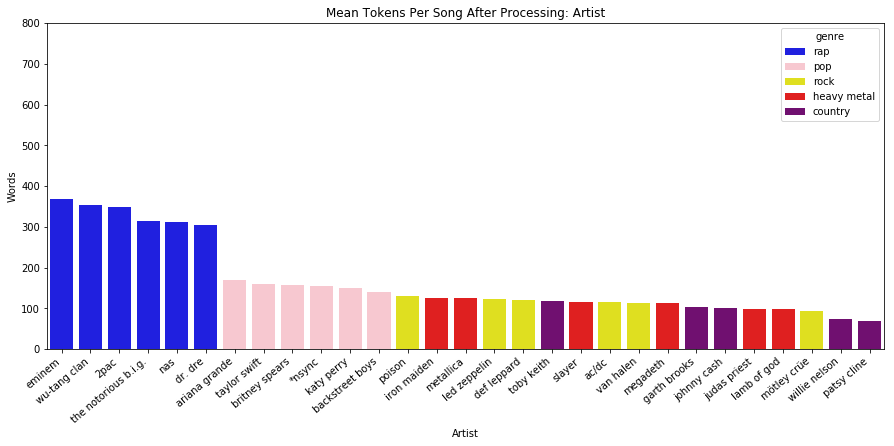

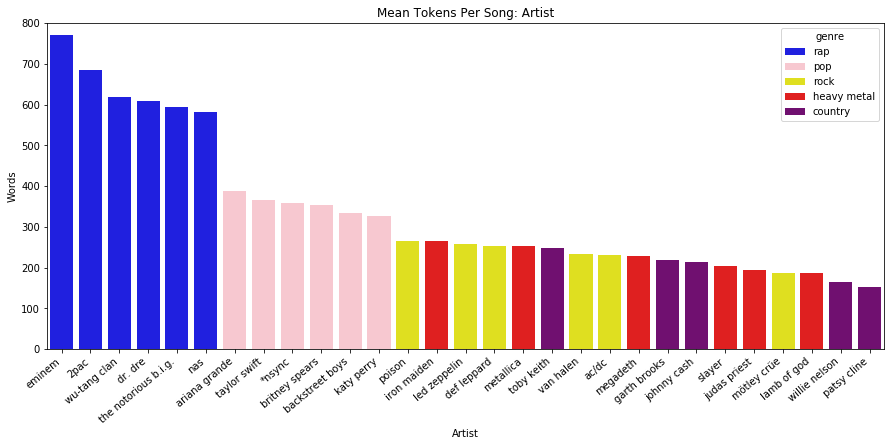

In [10]:
# genres = master[['artist', 'genre']].drop_duplicates('artist').sort_values('artist').set_index('artist').genre

# token_difference = master.total_token_count - master.processed_token_count

artist_mean_no_stops = pd.concat((master.artist, master.processed_token_count), axis=1).groupby('artist').mean()
artist_mean_no_stops = pd.concat((artist_mean_no_stops, genres), axis=1, ignore_index=True)
artist_mean_no_stops.columns = ['word_count', 'genre']
artist_mean_no_stops = artist_mean_no_stops.sort_values('word_count', ascending=False)

colormap = {'heavy metal': 'red', 
            'rap': 'blue', 
            'pop': 'pink', 
            'country': 'purple', 
            'rock': 'yellow'}

plt.figure(figsize=(15,6))
sns.barplot(x=artist_mean_no_stops.index, 
            y=artist_mean_no_stops.word_count, 
            data=artist_mean_no_stops, 
            hue='genre', 
            dodge=False, 
            palette=colormap)
plt.xticks(rotation=40, ha='right')
plt.xlabel('Artist')
plt.ylabel('Words')
plt.ylim(0,800)
plt.title('Mean Tokens Per Song After Processing: Artist')
plt.show()

plt.figure(figsize=(15,6))
sns.barplot(x=artist_mean_tokens.index, 
            y=artist_mean_tokens.word_count, 
            data=artist_mean_tokens, 
            hue='genre', 
            dodge=False, 
            palette=colormap)
plt.xticks(rotation=40, ha='right')
plt.xlabel('Artist')
plt.ylabel('Words')
plt.ylim(0,800)
plt.title('Mean Tokens Per Song: Artist')
plt.show()

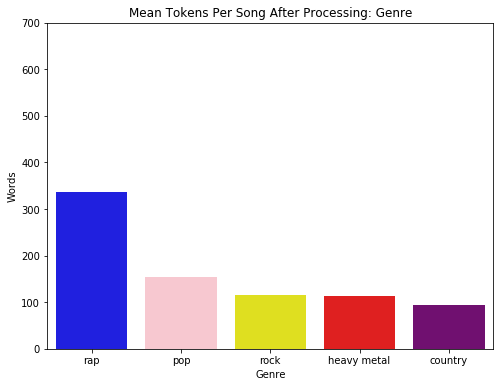

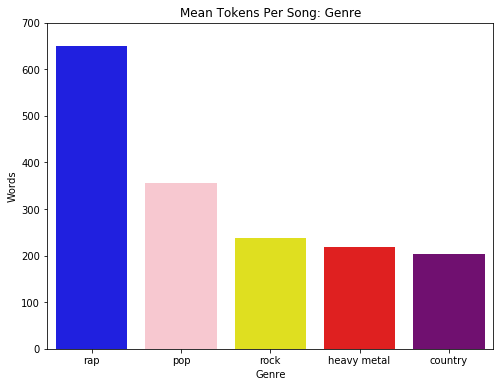

In [11]:
genre_mean_no_stops = pd.concat((master.genre, master.processed_token_count), axis=1).groupby('genre').mean()
genre_mean_no_stops.columns = ['word_count']
genre_mean_no_stops = genre_mean_no_stops.sort_values('word_count', ascending=False)

colormap = {'heavy metal': 'red', 
            'rap': 'blue', 
            'pop': 'pink', 
            'country': 'purple', 
            'rock': 'yellow'}


plt.figure(figsize=(8,6))
sns.barplot(x=genre_mean_no_stops.index, 
            y=genre_mean_no_stops.word_count, 
            data=genre_mean_no_stops, 
            hue=genre_mean_no_stops.index, 
            dodge=False, 
            palette=colormap).legend_.remove()
plt.xlabel('Genre')
plt.ylabel('Words')
plt.ylim(0,700)
plt.title('Mean Tokens Per Song After Processing: Genre')
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=genre_mean_tokens.index, 
            y=genre_mean_tokens.word_count, 
            data=genre_mean_tokens, 
            hue=genre_mean_tokens.index, 
            dodge=False, 
            palette=colormap).legend_.remove()
plt.xlabel('Genre')
plt.ylabel('Words')
plt.ylim(0,700)
plt.title('Mean Tokens Per Song: Genre')
plt.show()

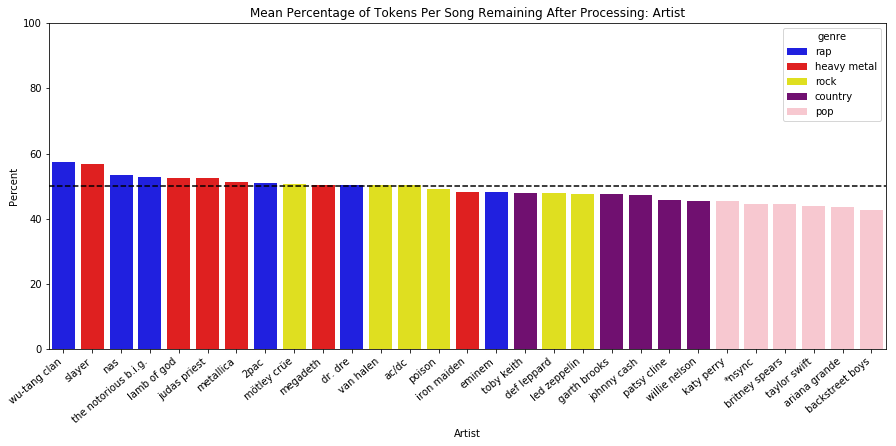

In [12]:
percent_remaining = (master.processed_token_count / master.total_token_count)*100

artist_mean_percent = pd.concat((master.artist, percent_remaining), axis=1).groupby('artist').mean()
artist_mean_percent = pd.concat((artist_mean_percent, genres), axis=1, ignore_index=True)
artist_mean_percent.columns = ['word_count', 'genre']
artist_mean_percent = artist_mean_percent.sort_values('word_count', ascending=False)

colormap = {'heavy metal': 'red', 
            'rap': 'blue', 
            'pop': 'pink', 
            'country': 'purple', 
            'rock': 'yellow'}

plt.figure(figsize=(15,6))
sns.barplot(x=artist_mean_percent.index, 
            y=artist_mean_percent.word_count, 
            data=artist_mean_percent, 
            hue='genre', 
            dodge=False, 
            palette=colormap)
plt.xticks(rotation=40, ha='right')
plt.axhline(50, linestyle='--', color='black')
plt.xlabel('Artist')
plt.ylabel('Percent')
plt.ylim(0, 100)
plt.title('Mean Percentage of Tokens Per Song Remaining After Processing: Artist')
plt.show()

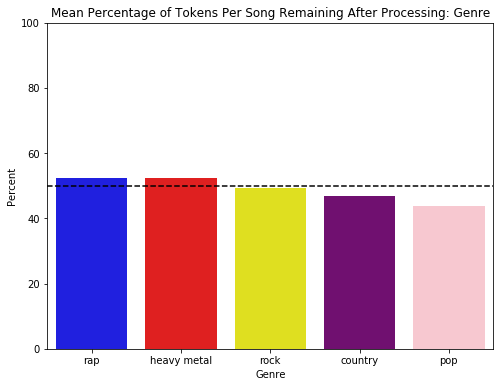

In [13]:
genre_mean_percent = pd.concat((master.genre, percent_remaining), axis=1).groupby('genre').mean()
genre_mean_percent.columns = ['word_count']
genre_mean_percent = genre_mean_percent.sort_values('word_count', ascending=False)

colormap = {'heavy metal': 'red', 
            'rap': 'blue', 
            'pop': 'pink', 
            'country': 'purple', 
            'rock': 'yellow'}

plt.figure(figsize=(8,6))
sns.barplot(x=genre_mean_percent.index, 
            y=genre_mean_percent.word_count,  
            hue=genre_mean_percent.index, 
            dodge=False, 
            palette=colormap).legend_.remove()
plt.axhline(50, linestyle='--', color='black')
plt.xlabel('Genre')
plt.ylabel('Percent')
plt.ylim(0, 100)
plt.title('Mean Percentage of Tokens Per Song Remaining After Processing: Genre')
plt.show()

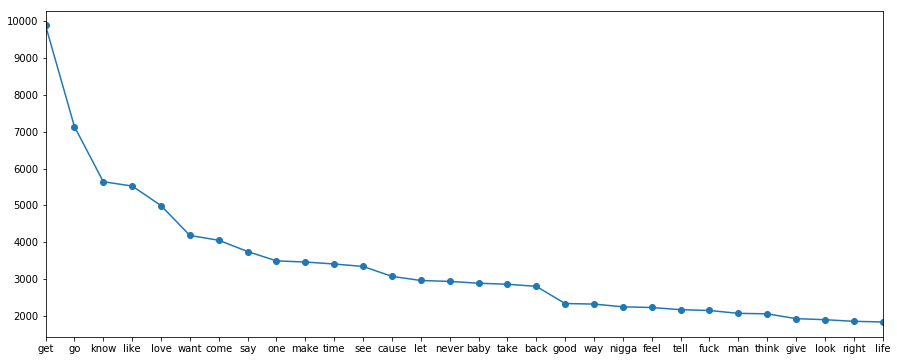

In [14]:
bag_list = []
for tokens in master.processed_tokens:
    bag_list.extend(tokens)

plt.figure(figsize=(15,6))
S = pd.Series(bag_list).value_counts().head(30)
pl = S.plot(marker='o')
pl.set_xticks(np.arange(len(S)))
pl.set_xticklabels(np.array(S.index))
plt.show()

In [15]:
S

get      9883
go       7139
know     5642
like     5525
love     4995
want     4184
come     4054
say      3748
one      3494
make     3463
time     3409
see      3343
cause    3074
let      2962
never    2937
baby     2888
take     2860
back     2803
good     2337
way      2322
nigga    2247
feel     2229
tell     2169
fuck     2148
man      2070
think    2057
give     1927
look     1898
right    1854
life     1836
dtype: int64

In [463]:
# unique = []
# for word in bag_list:
#     if word not in unique and word[-2:] == 'in' and word not in all_words:
#         unique.append(word)
        

# F = open('ing words.txt', 'w')
# for word in sorted(unique):
#     try:
#         F.write(str(word) + ':' + str(word + 'g' + '\n'))
#     except:
#         F.write(str(word.encode('utf-8')) + ':' + str(word.encode('utf-8')) + 'g' + '\n')
# F.close()

In [17]:
# all_words = nltk.corpus.words.words()

In [16]:
# print(sorted(stop_words))

In [55]:
# tokens1 = tknzr.tokenize(master.lyrics.loc[353])

# clean_tokens = [token.lower() for token in tokens1 
#                 if token not in string.punctuation]

# token_pos_pairs = nltk.pos_tag(clean_tokens, tagset='universal')
# token_pos_pairs_ = nltk.pos_tag(clean_tokens)

# token_pos = [pos for token, pos in token_pos_pairs]
# token_pos_ = [pos for token, pos in token_pos_pairs_]

# pd.concat((pd.Series(clean_tokens), pd.Series(token_pos_), pd.Series(token_pos)), axis=1).head()

# nltk.help.upenn_tagset('DT')

In [243]:
# num = 2519

# lyric = master.lyrics.loc[num]

# word_tokens = nltk.regexp_tokenize(lyric, r"(\w+|\?|!)")

# word_tokens_lower = [word.lower() for word in word_tokens]

# for i, word in enumerate(word_tokens_lower):
#     for k, v in word_conversion.items():
#         if word == k:
#             word_tokens_lower[i] = v

# detoken = nltk.tokenize.treebank.TreebankWordDetokenizer()

# lyric_string = detoken.detokenize(word_tokens_lower)

# new_word_tokens = nltk.regexp_tokenize(lyric_string, r"(\w+|\?|!)")

# lemmatizer = nltk.WordNetLemmatizer()

# lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in new_word_tokens]
# lemmatized_tokens = [lemmatizer.lemmatize(word, pos='n') for word in lemmatized_tokens]
# lemmatized_tokens = [lemmatizer.lemmatize(word, pos='a') for word in lemmatized_tokens]
# lemmatized_tokens = [lemmatizer.lemmatize(word, pos='r') for word in lemmatized_tokens]

# stop_words = nltk.corpus.stopwords.words('english')

# no_stopwords = [word for word in lemmatized_tokens 
#                 if word not in stop_words 
#                 and word not in string.punctuation 
#                 and word not in more_words 
#                 and len(word) > 1]

# print('Song: ' + master.song[num])
# print('Artist: ' + master.artist[num])
# print('Album: ' + master.album[num])
# print('')
# print('Lyrics:')
# print(lyric)
# print('')
# print('Cleaned Bag-of-Lyrics:')
# print(no_stopwords)